In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor

In [2]:
data = pd.read_csv('blood_count_dataset.csv')

In [3]:
data['Gender'] =data['Gender'].map({'Male': 0, 'Female': 1})

In [4]:
X = data.drop(columns=['Hemoglobin'])
y = data['Hemoglobin']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
rf_pred = rf.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)

In [8]:
svm = SVR(kernel='rbf')
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)
svm_rmse = np.sqrt(mean_squared_error(y_test, svm_pred))
svm_r2 = r2_score(y_test, svm_pred)

In [9]:
ann = MLPRegressor(hidden_layer_sizes=(20,), activation='relu', solver='adam', learning_rate_init=0.001, max_iter=2000, random_state=42)
ann.fit(X_train_scaled, y_train)
ann_pred = ann.predict(X_test_scaled)
ann_rmse = np.sqrt(mean_squared_error(y_test, ann_pred))
ann_r2 = r2_score(y_test, ann_pred)

In [10]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_r2 = r2_score(y_test, knn_pred)

In [11]:
avg_pred = (rf_pred + svm_pred + ann_pred) / 3
avg_rmse = np.sqrt(mean_squared_error(y_test, avg_pred))
avg_r2 = r2_score(y_test, avg_pred)

In [12]:
voting_ensemble = VotingRegressor(estimators=[('rf', rf), ('svm', svm), ('ann', ann)])
voting_ensemble.fit(X_train_scaled, y_train)
voting_pred = voting_ensemble.predict(X_test_scaled)
voting_rmse = np.sqrt(mean_squared_error(y_test, voting_pred))
voting_r2 = r2_score(y_test, voting_pred)

In [13]:
%pip install xgboost

from xgboost import XGBRegressor


# Instantiate the XGBoost regressor
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Train the model
xgb.fit(X_train_scaled, y_train)

# Make predictions
xgb_pred = xgb.predict(X_test_scaled)

# Calculate evaluation metrics
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_r2 = r2_score(y_test, xgb_pred)




Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
%pip install lightgbm 
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Instantiate the LightGBM Regressor
lgbm = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42)

# Train the model
lgbm.fit(X_train_scaled, y_train)
lgbm_pred = lgbm.predict(X_test_scaled)
lgbm_rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred))
lgbm_r2 = r2_score(y_test, lgbm_pred)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 150
[LightGBM] [Info] Number of data points in the train set: 312, number of used features: 8
[LightGBM] [Info] Start training from score 12.987821
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [15]:
results = []

In [16]:
results.append(['Random Forest', rf_rmse, rf_r2])
results.append(['SVM', svm_rmse, svm_r2])
results.append(['ANN', ann_rmse, ann_r2])
results.append(['KNN', knn_rmse, knn_r2])
results.append(['Average Ensemble', avg_rmse, avg_r2])
results.append(['Voting Ensemble', voting_rmse, voting_r2])
results.append(['XGBoost',xgb_rmse,xgb_r2])
results.append(['LightGBM',lgbm_rmse,lgbm_r2])

In [17]:
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R²'])

In [18]:
print(results_df)

              Model      RMSE        R²
0     Random Forest  0.047227  0.998511
1               SVM  0.253863  0.956987
2               ANN  0.383087  0.902052
3               KNN  0.181675  0.977971
4  Average Ensemble  0.204481  0.972093
5   Voting Ensemble  0.204481  0.972093
6           XGBoost  0.011058  0.999918
7          LightGBM  0.160266  0.982857



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


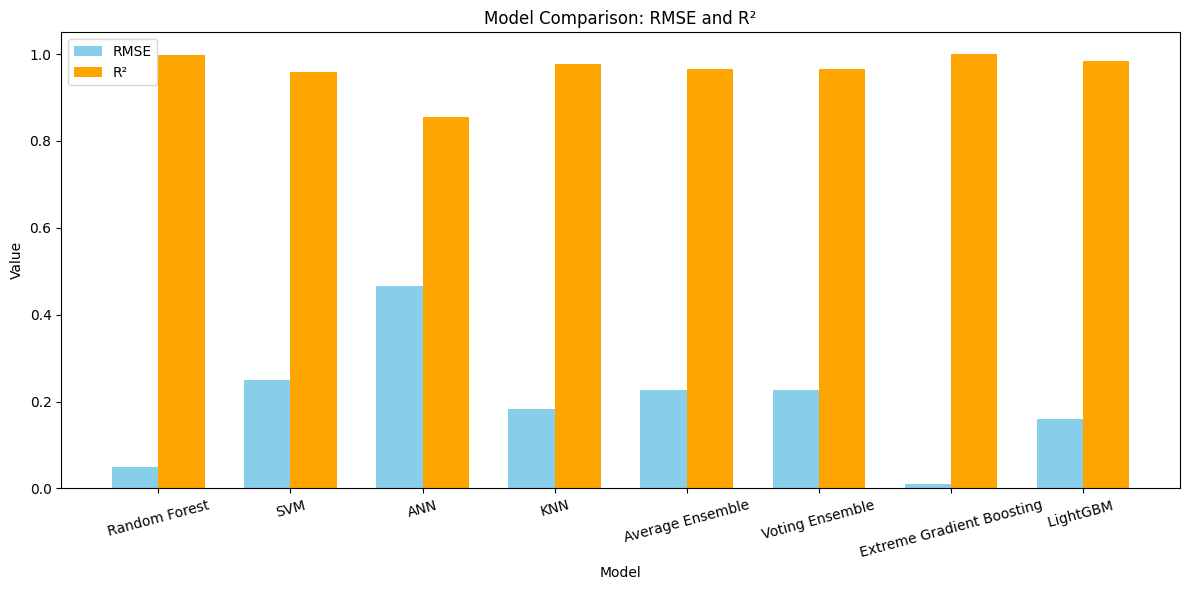

In [19]:
%pip install matplotlib

import matplotlib.pyplot as plt
data = {
    "Model": [
        "Random Forest", "SVM", "ANN", "KNN", 
        "Average Ensemble", "Voting Ensemble", "Extreme Gradient Boosting","LightGBM "
    ],
    "RMSE": [0.050069, 0.250360, 0.465749, 0.181675, 0.227211, 0.227211, 0.011058,0.160266],
    "R²": [0.998327, 0.958166, 0.855220, 0.977971, 0.965544, 0.965544, 0.999918,0.982857]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Bar graph for RMSE
plt.figure(figsize=(12, 6))
x = np.arange(len(df["Model"]))  # X-axis positions
width = 0.35  # Bar width

# Create bars for RMSE and R²
plt.bar(x - width/2, df["RMSE"], width, label="RMSE", color="skyblue")
plt.bar(x + width/2, df["R²"], width, label="R²", color="orange")

# Add labels and title
plt.xlabel("Model")
plt.ylabel("Value")
plt.title("Model Comparison: RMSE and R²")
plt.xticks(x, df["Model"], rotation=15)  # Set x-axis labels
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

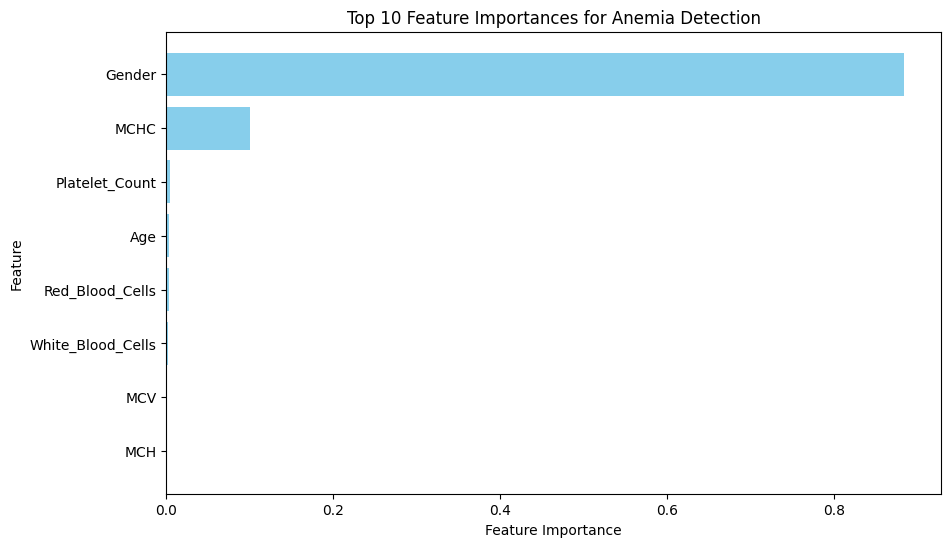

In [20]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
# Get feature importances
importances = xgb.feature_importances_
feature_names = X.columns

# Sort feature importance
indices = np.argsort(importances)[::-1]
top_features = feature_names[indices][:10]  # Select top 10 features
top_importances = importances[indices][:10]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_features[::-1], top_importances[::-1], color='skyblue')  # Reverse for proper order
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances for Anemia Detection")
plt.show()

In [21]:
import joblib


In [ ]:
joblib.dump(rf, 'XGBoost.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']